<a href="https://colab.research.google.com/github/tableClothed/ML-Projects/blob/master/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[TUTORIAL](https://www.tensorflow.org/tutorials/keras/classification) by TensorFlow.org

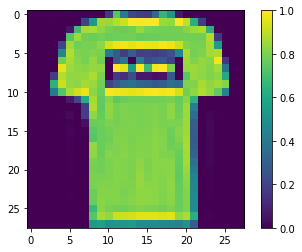

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# tshirt      - 0
# trouser     - 1
# pullover    - 2
# dress       - 3
# coat        - 4
# sandal      - 5
# shirt       - 6
# sneaker     - 7
# bag         - 8
# ankle boot  - 9

train_images = train_images/255.0
test_images = test_images/255.0 # to get the decimal/float values

plt.figure()
plt.grid(False)
plt.imshow(train_images[1])
plt.colorbar()
plt.show()


In [4]:
print(train_labels)

[9 0 0 ... 3 0 5]


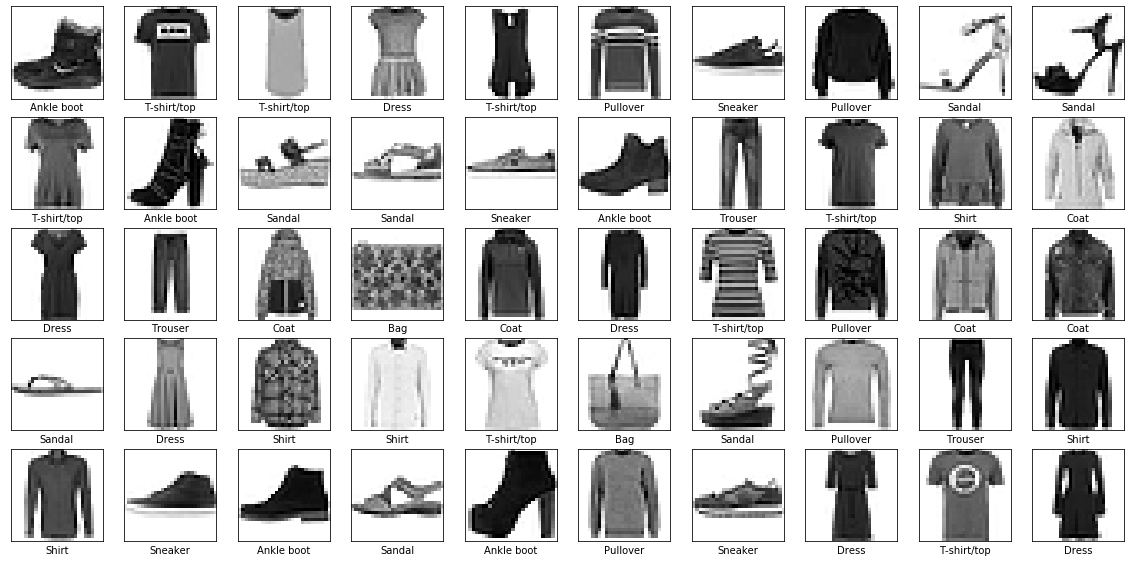

In [19]:
# first 50 images from training set
plt.figure(figsize=(20, 20)) # skala
for i in range(50): # ile elementów
  plt.subplot(10, 10, i+1) # offset
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary) # cmap=plt.cm.binary <- przekształca na czarno-biały
  plt.xlabel(class_names[int(train_labels[i])])
plt.show()

Podstawowym elementem składowym sieci neuronowej jest warstwa. Warstwy wyodrębniają reprezentacje z wprowadzonych do nich danych. Mamy nadzieję, że te reprezentacje mają znaczenie dla omawianego problemu.

Większość Deep Learningu polega na łączeniu ze sobą prostych warstw. Większość warstw, takich jak tf.keras.layers.Dense, ma parametry, których uczy się podczas treningu.

Pierwsza warstwa w tej sieci, tf.keras.layers.Flatten, przekształca format obrazów z dwuwymiarowej tablicy (28 na 28 pikseli) w jednowymiarową (28 * 28 = 784 pikseli). Pomyśl o tej warstwie jako o rozłożeniu rzędów pikseli na obrazie i ustawieniu ich w kolejce. Ta warstwa nie ma parametrów do nauki; formatuje tylko dane.

Po spłaszczeniu pikseli sieć składa się z sekwencji dwóch warstw tf.keras.layers.Dense. Są to gęsto połączone lub w pełni połączone warstwy neuronowe. Pierwsza gęsta warstwa ma 128 węzłów (lub neuronów). Druga (i ostatnia) warstwa to 10-węzłowa warstwa softmax, która zwraca tablicę 10 wyników prawdopodobieństwa, które sumują się do 1. Każdy węzeł zawiera ocenę wskazującą prawdopodobieństwo, że bieżący obraz należy do jednej z 10 klas.

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), # pierwszy layer: 28 * 28 = 784. Flatten 'zmiękcza' tablicę
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax') # zwraca jedną z 10 opcji (patrz: labels)
])

Zanim model będzie gotowy do treningu, potrzebuje jeszcze kilku ustawień. Są one dodawane podczas kroku kompilacji modelu:

*   **Funkcja utraty** (loss function) - mierzy to, jak dokładny jest model podczas treningu. Chcesz zminimalizować tę funkcję, aby „sterować” modelem we właściwym kierunku.
*   **Optymalizator** - w ten sposób model jest aktualizowany na podstawie danych, które widzi i funkcji utraty.
*   **Metryki** - Służy do monitorowania kroków szkolenia i testowania. W poniższym przykładzie użyto dokładności, czyli części poprawnie sklasyfikowanych obrazów.

In [0]:
model.compile(optimizer='adam',
              # jak model jest aktualizowany, based na jego danych i
              # funkcji straty
              loss='sparse_categorical_crossentropy',
              # mierzy jak dokładny jest model. trzeba ją zminimalizować,
              # żeby model był dkoładniejszy
              metrics=['accuracy'])
              # monitoruje trening i jego kroki. 'accuracy' używa
              # ułamka obrazów, które są prawidłowo sklasyfikowane

In [26]:
model.fit(train_images, train_labels, epochs=10)
# epochs - epoki

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2309 - acc: 0.9128
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2220 - acc: 0.9172
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2154 - acc: 0.9198
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2099 - acc: 0.9214
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2028 - acc: 0.9232
Epoch 6/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1985 - acc: 0.9247
Epoch 7/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1954 - acc: 0.9261
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1872 - acc: 0.9304
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1845 - acc: 0.9308
Epoch 10/10
60000/60000 [==============================] - 

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
# verbose - gadatliwy / rozwlekły
print('Test accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3570 - acc: 0.8877
Test accuracy: 0.8877


In [0]:
predictions = model.predict(test_images)

In [30]:
predictions[0]

array([2.1345554e-10, 6.8128455e-17, 5.4135404e-14, 2.5580035e-15,
       2.0008032e-12, 4.6510075e-05, 1.9747569e-12, 1.8449053e-03,
       3.8660505e-10, 9.9810863e-01], dtype=float32)

Prognoza jest tablicą 10 liczb. Reprezentują one „pewności” modelu, że obraz odpowiada każdemu z 10 różnych artykułów odzieżowych. Możesz zobaczyć, która etykieta ma najwyższą wartość ufności.

In [31]:
np.argmax(predictions[0])

9

Tak więc model jest najbardziej pewny, że ten obraz to botki do kostki, czyli class_names[9]. Badanie etykiety testowej pokazuje, że ta klasyfikacja jest poprawna.
Poniżej graf dla 10 class predicitons:

In [0]:
def plot_image(i, predicitons_array, true_label, img):
  predicitons_array, true_label, img = predicitons_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicitons_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predicitons_array),
                                       class_names[true_label]),
                                       color = color)
      

In [0]:
def plot_value_array(i, predicitons_array, true_label):
  predicitons_array, true_label = predicitons_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  this_plot = plt.bar(range(10), predicitons_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicitons_array)

  this_plot[predicted_label].set_color('red')
  this_plot[true_label].set_color('blue')

Spójrzmy na 0 obraz, prognozy i tablicę prognoz. Prawidłowe etykiety prognozy są niebieskie, a nieprawidłowe etykiety prognozy są czerwone. Liczba podaje procent (spośród 100) przewidywanej etykiety.

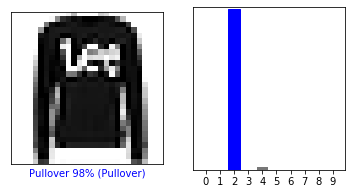

In [67]:
i = 1
plt.figure(figsize=(6, 3)) # width, height in inches
plt.subplot(1, 2, 1) # nrows, ncols, index
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


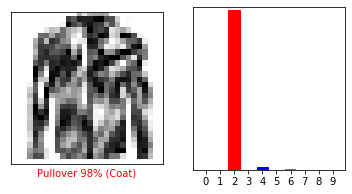

In [68]:
i = 17
plt.figure(figsize=(6, 3)) # width, height in inches
plt.subplot(1, 2, 1) # nrows, ncols, index
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


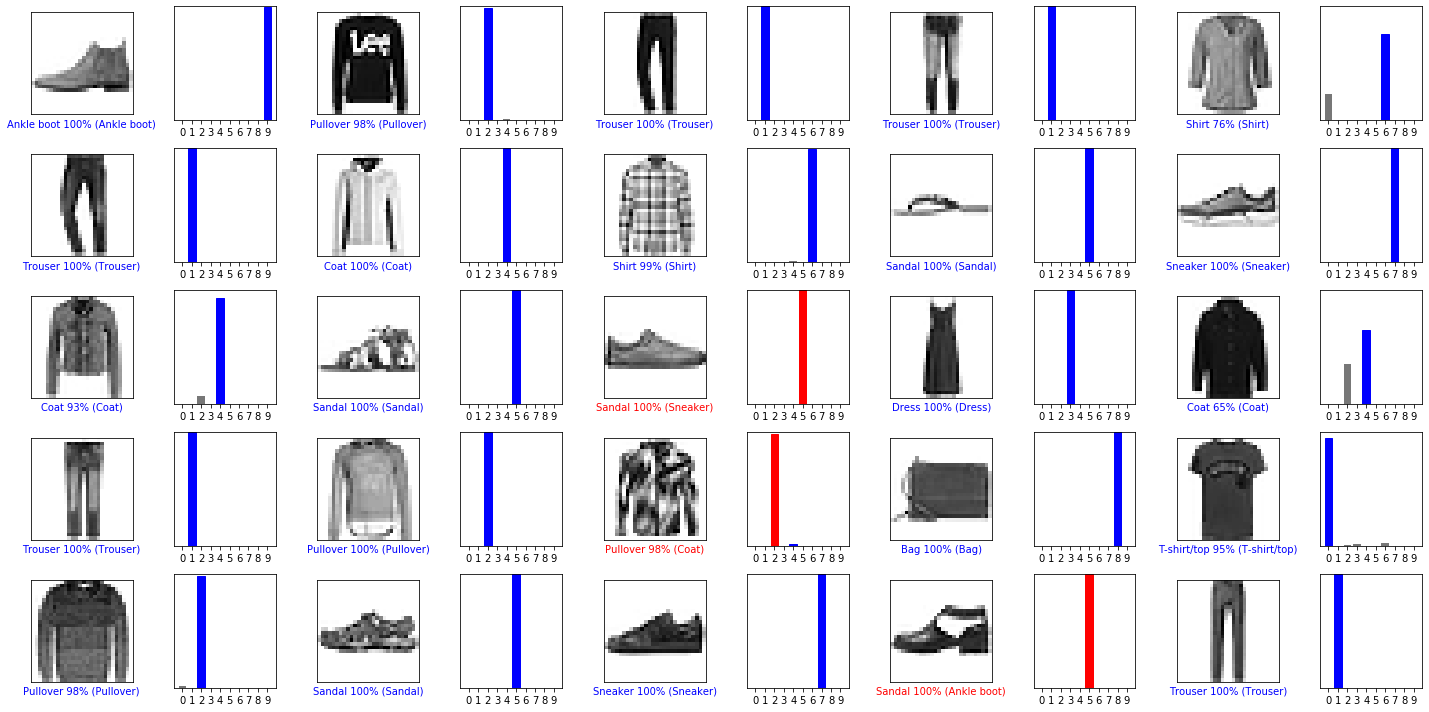

In [72]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [74]:
# USING TRAINED MODEL TO MAKE A PREDICTION ABUT A SINGLE IMAGE

# gra an image to make a prediction about a single image

img = test_images[1]

print(img.shape)

(28, 28)


Modele **tf.keras** są zoptymalizowane pod kątem przewidywania partii lub zbioru przykładów jednocześnie. W związku z tym, nawet jeśli używasz jednego obrazu, musisz dodać go do listy:

In [80]:
# add the img to a batch(partii) where it's the only member

img = (np.expand_dims(img, 0))

print(img.shape)

(1, 1, 1, 28, 28)


In [81]:
img

array([[[[[0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.        , 0.        , 0.        ,
           0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
           0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
           0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
           0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
           1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
           0.28235294, 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
           0.91764706, 0.89803922, 0.93333333, 0.956

In [76]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.0653107e-05 6.2204046e-15 9.8356527e-01 2.0874419e-14 1.6300239e-02
  6.9961933e-14 7.3904172e-05 2.4119699e-22 3.2606779e-13 8.0267209e-20]]


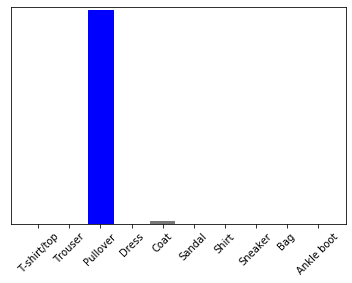

In [77]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [78]:
np.argmax(predictions_single[0])

2